# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

import random

from d2l.tensorflow import config

config.setup()

Tensorflow running on CPU


In [2]:
n_inputs = 2
n_examples = 1000

true_W = ([2, -3.4])
true_b = 4.2

features = tf.random.normal(mean=0, stddev=1, shape=(n_examples, n_inputs))
labels = tf.Variable(tf.tensordot(features, true_W, axes=1) + true_b)

In [3]:
labels.assign_add(tf.random.normal(mean=0, stddev=0.1, shape=labels.shape));

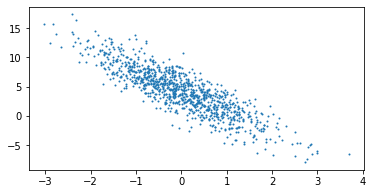

In [4]:
plt.figure(figsize=(6, 3))
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

## Reading data

In [5]:
def batch_iter(features, labels, batch_size):
    num_examples = features.shape[0]
    indices = [*range(num_examples)]
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.convert_to_tensor(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

## Initialize params

In [6]:
W = tf.Variable(tf.random.normal(mean=0, stddev=0.01, shape=(n_inputs, 1)), name='W')
b = tf.Variable(tf.zeros(shape=(1,)), name='b')

## Define linear function

In [7]:
def linreg(X, W, b):
    return tf.tensordot(X, W, axes=1) + b

## Define loss function

In [8]:
def squared_loss(y, y_hat):
    y_hat = tf.reshape(y_hat, y.shape)
    return (y - y_hat) ** 2 / 2

## Define training step

In [9]:
def train(X, y, W, b, lr, batch_size):
    with tf.GradientTape() as t:
        y_hat = linreg(X, W, b)
        loss = squared_loss(y, y_hat)
    dW, db = t.gradient(loss, [W, b])
    W.assign_sub((lr * dW) / batch_size)
    b.assign_sub((lr * db) / batch_size)

## Training

In [10]:
epochs = 10
lr = 0.03
batch_size = 32
loss = squared_loss
train_loss = []

for epoch in range(epochs):
    for X, y in batch_iter(features, labels, batch_size):
        train(X, y, W, b, lr, batch_size)
    epoch_loss = loss(linreg(features, W, b), labels)
    epoch_loss = tf.math.reduce_mean(epoch_loss)
    epoch_loss = tf.get_static_value(epoch_loss)
    train_loss.append(epoch_loss)
    print('epoch: {:02d}, loss: {:.03f}'.format(epoch + 1, epoch_loss))

epoch: 01, loss: 2.408
epoch: 02, loss: 0.344
epoch: 03, loss: 0.053
epoch: 04, loss: 0.012
epoch: 05, loss: 0.006
epoch: 06, loss: 0.005
epoch: 07, loss: 0.005
epoch: 08, loss: 0.005
epoch: 09, loss: 0.005
epoch: 10, loss: 0.005


[]

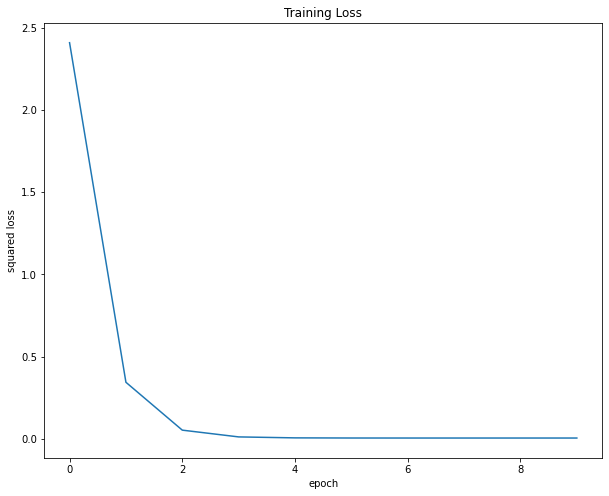

In [11]:
plt.figure(figsize=(10, 8))

plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('epoch')
plt.ylabel('squared loss')

plt.plot()

## Compare W and b with real values

In [12]:
print('Real W: \n{}\nTrained W: \n{}'.format(true_W, W.value()))

Real W: 
[2, -3.4]
Trained W: 
[[ 1.9980913]
 [-3.3931146]]


In [13]:
print('Real b: \n{}\nTrained b: \n{}'.format(true_b, b.value()))

Real b: 
4.2
Trained b: 
[4.201841]
